### Задача 2

In [148]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline

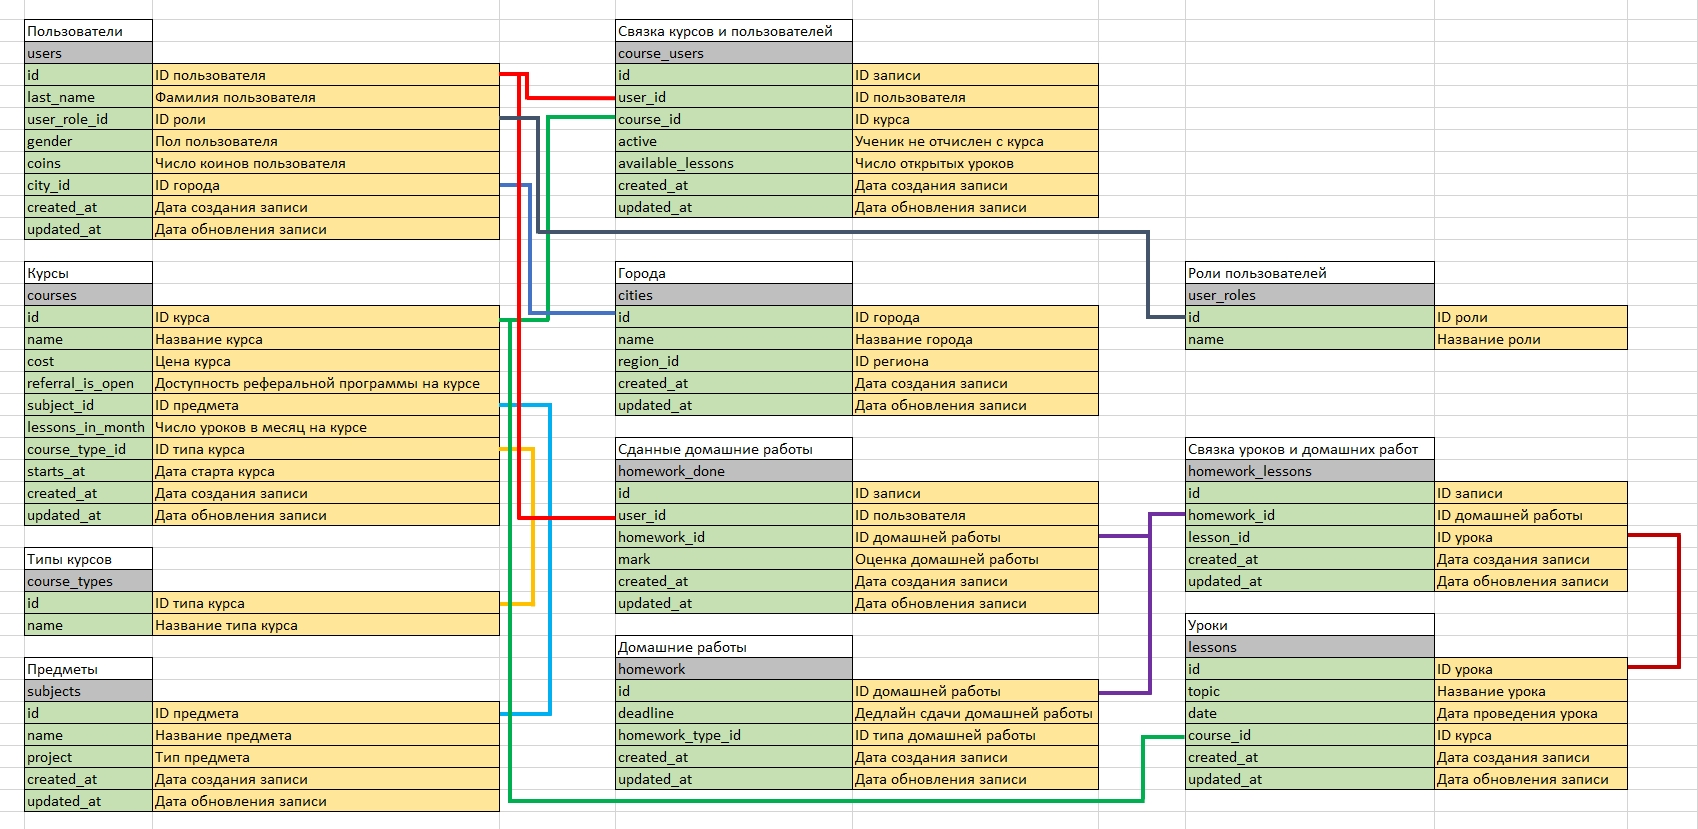

In [151]:
cities = pd.read_csv('cities.csv')
course_types = pd.read_csv('course_types.csv')
course_users = pd.read_csv('course_users.csv')
courses = pd.read_csv('courses.csv')
homework = pd.read_csv('homework.csv')
homework_done = pd.read_csv('homework_done.csv')
homework_lessons = pd.read_csv('homework_lessons.csv')
lessons = pd.read_csv('lessons.csv')
subjects = pd.read_csv('subjects.csv')
user_roles = pd.read_csv('user_roles.csv')
users = pd.read_csv('users.csv')

Создадим датасет включающий в себя:

ID курса, Название курса, Предмет, Тип предмета, Тип курса, Дата старта курса, ID ученика, Фамилия ученика, Город ученика, Ученик не отчислен с курса, Дата открытия курса ученику, Сколько полных месяцев курса открыто у ученика, Число сданных ДЗ ученика на курсе.

In [154]:
courses.head(3) #  ознакомимся с датасетом courses

,id,name,cost,referral_is_open,subject_id,lessons_in_month,course_type_id,starts_at,created_at,updated_at
0,16,Годовой 2к25 стандарт,4590,1,1,10,1,2024-09-16,2024-05-07 09:16:48,2024-10-21 16:05:07
1,17,Годовой 2к25 стандарт,4590,1,2,10,1,2024-09-20,2024-05-07 09:19:16,2024-10-18 17:44:49
2,18,Годовой 2к25 стандарт,4590,1,3,10,1,2024-09-18,2024-05-07 09:24:04,2024-10-18 17:44:54


In [156]:
courses_df = courses[['id', 'name', 'subject_id', 'course_type_id', 'starts_at']] # оставляем только нужные нам колонки

In [158]:
courses_df = courses_df.rename(columns = {'name': 'name_of_course', 'starts_at': 'starts_at_course'}) # переименовываем колонки в другие названия

In [160]:
subjects = subjects.rename(columns = {'id': 'subject_id', 'name': 'subject'}) # переименовываем колонки в другие названия

In [162]:
subjects_df = subjects[['subject_id', 'subject', 'project']] # оставляем только нужные нам колонки

In [164]:
subjects_df.head(3)

,subject_id,subject,project
0,1,Обществознание,ЕГЭ
1,2,Английский язык,ЕГЭ
2,3,История,ЕГЭ


In [166]:
course_sub = courses_df.merge(subjects_df, how='outer', on='subject_id') # обьединяем в один дфинформацию о курсах и предметах

In [168]:
course_sub.head(3)

,id,name_of_course,subject_id,course_type_id,starts_at_course,subject,project
0,16,Годовой 2к25 стандарт,1,1,2024-09-16,Обществознание,ЕГЭ
1,26,Летняя школа 2к24,1,3,2024-06-25,Обществознание,ЕГЭ
2,40,НЕдетский курс,1,3,2024-08-04,Обществознание,ЕГЭ


In [170]:
users.head(3) # знакомимся с дф с информацией об учениках

,id,last_name,user_role_id,gender,coins,city_id,created_at,updated_at
0,10001,Markova,5,NaN,880,784.0,2024-07-25 17:51:42,2024-11-09 18:26:55
1,10002,Коваленко,5,NaN,160,508.0,2024-07-25 17:55:38,2024-10-19 18:28:46
2,10003,Драгомирецкий,5,NaN,200,NaN,2024-07-25 18:30:01,2024-09-25 07:35:22


In [172]:
users = users.rename(columns = {'id': 'user_id'}) 

In [174]:
user_last_name = users[['user_id', 'last_name', 'city_id']]

In [176]:
course_users.head(3)

,id,user_id,course_id,active,available_lessons,created_at,updated_at
0,69904,10001,29,0,NaN,2024-07-25 18:04:19,2024-07-25 18:04:19
1,69908,10001,33,0,NaN,2024-07-25 18:04:20,2024-07-25 18:04:20
2,69910,10001,16,1,20.0,2024-07-25 18:04:20,2024-10-16 15:21:34


In [179]:
users_cour = course_users.merge(user_last_name, on='user_id').query('active != 0') 
# обьединяем информацию о курсах и учениках

In [181]:
users_cour.head(3)

,id,user_id,course_id,active,available_lessons,created_at,updated_at,last_name,city_id
2,69910,10001,16,1,20.0,2024-07-25 18:04:20,2024-10-16 15:21:34,Markova,784.0
3,69911,10001,19,1,18.0,2024-07-25 18:04:20,2024-10-22 17:06:53,Markova,784.0
4,78748,10001,40,1,30.0,2024-08-05 12:14:09,2024-08-05 12:14:09,Markova,784.0


In [183]:
cities.head(3)

,id,name,region_id,created_at,updated_at
0,1,Адыгейск,1,NaN,NaN
1,2,Майкоп,1,NaN,NaN
2,3,Горно-Алтайск,3,NaN,NaN


In [185]:
user_city = cities[['id', 'name']]

In [187]:
user_city = user_city.rename(columns = {'id': 'city_id', 'name': 'city'}) 

In [189]:
users_cour = users_cour.merge(user_city, on='city_id') # добавляем в общий дф информацию по городам

In [191]:
users_cour.head(3)

,id,user_id,course_id,active,available_lessons,created_at,updated_at,last_name,city_id,city
0,69910,10001,16,1,20.0,2024-07-25 18:04:20,2024-10-16 15:21:34,Markova,784.0,Самара
1,69911,10001,19,1,18.0,2024-07-25 18:04:20,2024-10-22 17:06:53,Markova,784.0,Самара
2,78748,10001,40,1,30.0,2024-08-05 12:14:09,2024-08-05 12:14:09,Markova,784.0,Самара


In [193]:
users_cour = users_cour.rename(columns = {'created_at': 'date_open_course', 'updated_at': 'date_update_course'}) 

In [195]:
users_cour = users_cour.drop(['available_lessons'], axis = 1) # удаляем ненужные колонки из дф

In [197]:
users_cour.head(3)

,id,user_id,course_id,active,date_open_course,date_update_course,last_name,city_id,city
0,69910,10001,16,1,2024-07-25 18:04:20,2024-10-16 15:21:34,Markova,784.0,Самара
1,69911,10001,19,1,2024-07-25 18:04:20,2024-10-22 17:06:53,Markova,784.0,Самара
2,78748,10001,40,1,2024-08-05 12:14:09,2024-08-05 12:14:09,Markova,784.0,Самара


In [199]:
courses_df = courses_df.rename(columns = {'id': 'course_id'}) # переименовываем id в соответствующий ключ к другой таблице

In [201]:
courses_df.head(3)

,course_id,name_of_course,subject_id,course_type_id,starts_at_course
0,16,Годовой 2к25 стандарт,1,1,2024-09-16
1,17,Годовой 2к25 стандарт,2,1,2024-09-20
2,18,Годовой 2к25 стандарт,3,1,2024-09-18


In [203]:
full_df = users_cour.merge(courses_df, on='course_id') # дополняем общий дф данными о курсах

In [205]:
full_df.head(3)

,id,user_id,course_id,active,date_open_course,date_update_course,last_name,city_id,city,name_of_course,subject_id,course_type_id,starts_at_course
0,69910,10001,16,1,2024-07-25 18:04:20,2024-10-16 15:21:34,Markova,784.0,Самара,Годовой 2к25 стандарт,1,1,2024-09-16
1,69911,10001,19,1,2024-07-25 18:04:20,2024-10-22 17:06:53,Markova,784.0,Самара,Годовой 2к25 стандарт,4,1,2024-09-21
2,78748,10001,40,1,2024-08-05 12:14:09,2024-08-05 12:14:09,Markova,784.0,Самара,НЕдетский курс,1,3,2024-08-04


In [207]:
full_df.info() # смотрим информацию о получившемся дф, особое внимание уделяем типам данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11246 entries, 0 to 11245
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11246 non-null  int64  
 1   user_id             11246 non-null  int64  
 2   course_id           11246 non-null  int64  
 3   active              11246 non-null  int64  
 4   date_open_course    11246 non-null  object 
 5   date_update_course  11246 non-null  object 
 6   last_name           11246 non-null  object 
 7   city_id             11246 non-null  float64
 8   city                11246 non-null  object 
 9   name_of_course      11246 non-null  object 
 10  subject_id          11246 non-null  int64  
 11  course_type_id      11246 non-null  int64  
 12  starts_at_course    11246 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 1.1+ MB


In [212]:
full_df['date_open_course'] = pd.to_datetime(full_df['date_open_course'])
full_df['starts_at_course'] = pd.to_datetime(full_df['starts_at_course'])
full_df['date_update_course'] = pd.to_datetime(full_df['date_update_course'])
# чтобы узнать сколько полных месяцев курса открыто у ученика, вначале нужно преобразовать столбцы 'created_at', 'starts_at_course' в формат datetime

In [214]:
full_df.info() # проверяем изменентия в типе данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11246 entries, 0 to 11245
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11246 non-null  int64         
 1   user_id             11246 non-null  int64         
 2   course_id           11246 non-null  int64         
 3   active              11246 non-null  int64         
 4   date_open_course    11246 non-null  datetime64[ns]
 5   date_update_course  11246 non-null  datetime64[ns]
 6   last_name           11246 non-null  object        
 7   city_id             11246 non-null  float64       
 8   city                11246 non-null  object        
 9   name_of_course      11246 non-null  object        
 10  subject_id          11246 non-null  int64         
 11  course_type_id      11246 non-null  int64         
 12  starts_at_course    11246 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(6), ob

In [216]:
current_date = pd.to_datetime(datetime.now()) # получаем текущую дату с помощью библиотеки datetime
full_df['days_opened'] = (full_df['date_update_course'] - full_df['date_open_course']).dt.days # вычисляем разницу в днях
full_df['full_months_opened'] = (full_df['days_opened'] // 30) # переводим в полные месяцы, создаем новые колонки в дф

In [218]:
full_df.head(3)

,id,user_id,course_id,active,date_open_course,date_update_course,last_name,city_id,city,name_of_course,subject_id,course_type_id,starts_at_course,days_opened,full_months_opened
0,69910,10001,16,1,2024-07-25 18:04:20,2024-10-16 15:21:34,Markova,784.0,Самара,Годовой 2к25 стандарт,1,1,2024-09-16,82,2
1,69911,10001,19,1,2024-07-25 18:04:20,2024-10-22 17:06:53,Markova,784.0,Самара,Годовой 2к25 стандарт,4,1,2024-09-21,88,2
2,78748,10001,40,1,2024-08-05 12:14:09,2024-08-05 12:14:09,Markova,784.0,Самара,НЕдетский курс,1,3,2024-08-04,0,0


In [220]:
homework_done.head(3) # знакомимся с дф для дальнейших действий

,id,user_id,homework_id,mark,created_at,updated_at
0,6298,10001,282,100.0,2024-09-17 15:37:22,2024-09-18 12:47:33
1,6676,10001,279,NaN,2024-09-17 16:07:04,2024-09-17 16:07:05
2,10136,10001,257,100.0,2024-09-18 10:30:34,2024-09-18 12:19:51


In [222]:
hw_done = homework_done.groupby('user_id', as_index=False).agg({'homework_id':'count'}).rename(columns={'homework_id': 'count_hw_done'})
# создаем отдельный дф, в котором будет подсчитано количество выполненных дз каждым учеником

In [224]:
full_df = full_df.merge(hw_done, on='user_id') # добавляем новые данные о дз в общий датафрейм

In [226]:
full_df.head(3)

,id,user_id,course_id,active,date_open_course,date_update_course,last_name,city_id,city,name_of_course,subject_id,course_type_id,starts_at_course,days_opened,full_months_opened,count_hw_done
0,69910,10001,16,1,2024-07-25 18:04:20,2024-10-16 15:21:34,Markova,784.0,Самара,Годовой 2к25 стандарт,1,1,2024-09-16,82,2,22
1,69911,10001,19,1,2024-07-25 18:04:20,2024-10-22 17:06:53,Markova,784.0,Самара,Годовой 2к25 стандарт,4,1,2024-09-21,88,2,22
2,78748,10001,40,1,2024-08-05 12:14:09,2024-08-05 12:14:09,Markova,784.0,Самара,НЕдетский курс,1,3,2024-08-04,0,0,22


In [228]:
full_df = full_df.drop(['city_id', 'subject_id', 'course_type_id' ], axis = 1) # удаляем ненужные колонки

In [230]:
full_df.head(3)

,id,user_id,course_id,active,date_open_course,date_update_course,last_name,city,name_of_course,starts_at_course,days_opened,full_months_opened,count_hw_done
0,69910,10001,16,1,2024-07-25 18:04:20,2024-10-16 15:21:34,Markova,Самара,Годовой 2к25 стандарт,2024-09-16,82,2,22
1,69911,10001,19,1,2024-07-25 18:04:20,2024-10-22 17:06:53,Markova,Самара,Годовой 2к25 стандарт,2024-09-21,88,2,22
2,78748,10001,40,1,2024-08-05 12:14:09,2024-08-05 12:14:09,Markova,Самара,НЕдетский курс,2024-08-04,0,0,22


In [232]:
duplicates = full_df.duplicated()
duplicates.sum() # подсчитываем количество дупликатов в итоговом дф, если они имеются

0

In [234]:
full_df.isna().sum() # считаем пропущенные значения

id                    0
user_id               0
course_id             0
active                0
date_open_course      0
date_update_course    0
last_name             0
city                  0
name_of_course        0
starts_at_course      0
days_opened           0
full_months_opened    0
count_hw_done         0
dtype: int64

In [236]:
for_stat = full_df[['full_months_opened', 'count_hw_done']]
# создадим отдельный датафрейм для определения аномалий для количественных значений

In [238]:
for_stat.head(3)

,full_months_opened,count_hw_done
0,2,22
1,2,22
2,0,22


In [240]:
for_stat.describe() # выводим описательные статистики

,full_months_opened,count_hw_done
count,10783.000000,10783.000000
mean,0.213948,20.975239
std,0.603537,14.151001
min,0.000000,1.000000
25%,0.000000,11.000000
50%,0.000000,17.000000
75%,0.000000,29.000000
max,3.000000,82.000000


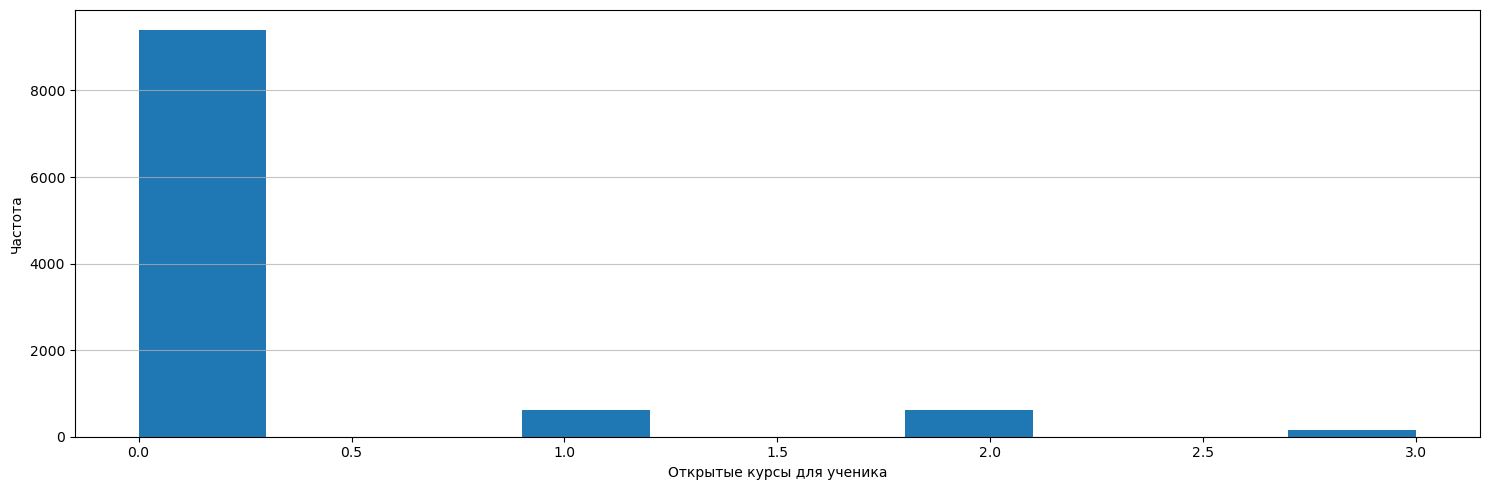

In [242]:
plt.figure(figsize=(15, 5))  # устанавливаем размер графика

# гистограмма для full_months_opened
plt.hist(for_stat['full_months_opened'])
plt.xlabel('Открытые курсы для ученика')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()  
plt.show()

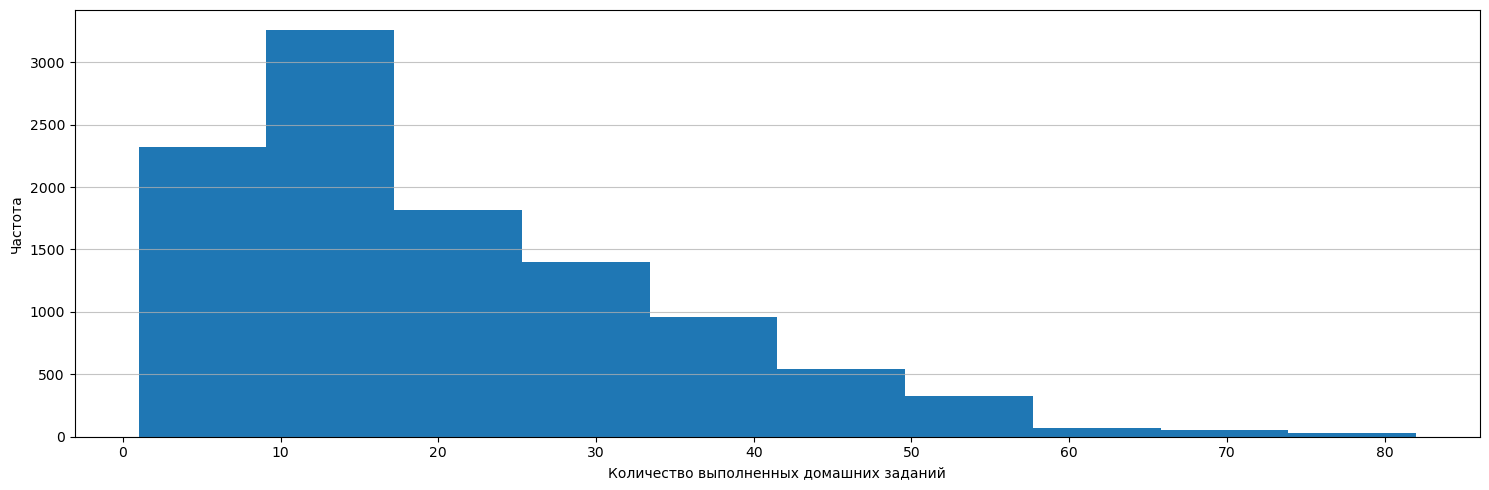

In [244]:
plt.figure(figsize=(15, 5))  # устанавливаем размер графика

# гистограмма для count_hw_done
plt.hist(for_stat['count_hw_done'])
plt.xlabel('Количество выполненных домашних заданий')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()  
plt.show()

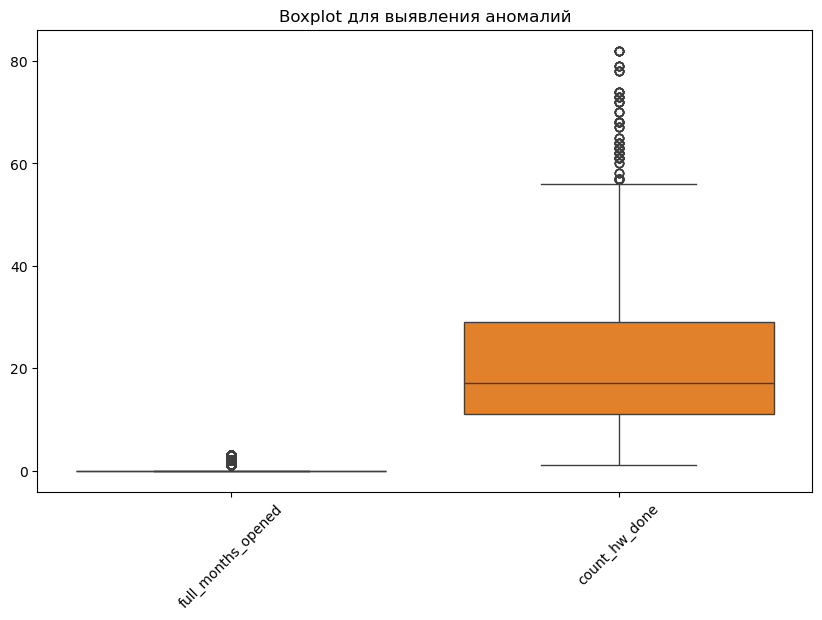

In [246]:
# построим боксплот для показа аномальных значений в датафрейме
plt.figure(figsize=(10, 6))
sns.boxplot(data=for_stat)
plt.title('Boxplot для выявления аномалий')
plt.xticks(rotation=45)
plt.show()

In [248]:
# используем Z-оценку для определения аномалий в каждой колонке.
# вычисляем Z-оценку для каждой колонки
z_scores = (for_stat - for_stat.mean()) / for_stat.std()

In [250]:
# определяем аномалии (например, Z-оценка больше 3 или меньше -3)
anomalies_z = (z_scores.abs() > 3)

print("Аномалии по Z-оценке:")
print(for_stat[anomalies_z])

Аномалии по Z-оценке:
       full_months_opened  count_hw_done
0                     NaN            NaN
1                     NaN            NaN
2                     NaN            NaN
3                     NaN            NaN
4                     NaN            NaN
...                   ...            ...
10778                 NaN            NaN
10779                 NaN            NaN
10780                 NaN            NaN
10781                 NaN            NaN
10782                 NaN            NaN

[10783 rows x 2 columns]


In [252]:
for_stat[anomalies_z].dropna()

,full_months_opened,count_hw_done
2239,3.0,68.0
2240,3.0,68.0
2241,3.0,68.0


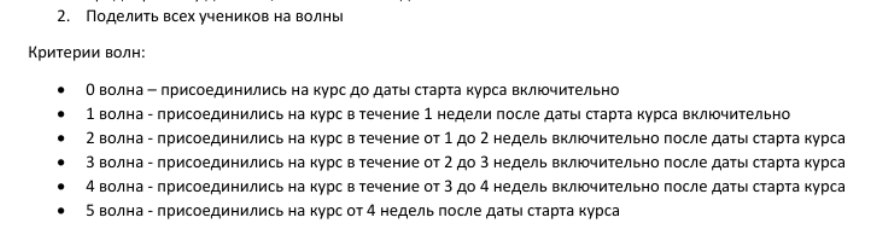

In [255]:
full_df['date_open_course'] = pd.to_datetime(full_df['date_open_course'])
# приводит date_open_course к формату даты без указания времени

In [257]:
# Вычисляем разницу в днях
full_df['days_difference'] = (full_df['date_open_course'] - full_df['starts_at_course']).dt.days

In [259]:
# Определяем условия для волн
conditions = [
    (full_df['days_difference'] <= 0),
    (full_df['days_difference'] > 0) & (full_df['days_difference'] <= 7),
    (full_df['days_difference'] > 7) & (full_df['days_difference'] <= 14),
    (full_df['days_difference'] > 14) & (full_df['days_difference'] <= 21),
    (full_df['days_difference'] > 21) & (full_df['days_difference'] <= 28),
    (full_df['days_difference'] > 28)
]

In [261]:
# Определяем соответствующие значения для волн
values = [0, 1, 2, 3, 4, 5]

In [263]:
# Применяем numpy.select для определения волн
full_df['wave'] = np.select(conditions, values)

In [265]:
full_df.head(3)

,id,user_id,course_id,active,date_open_course,date_update_course,last_name,city,name_of_course,starts_at_course,days_opened,full_months_opened,count_hw_done,days_difference,wave
0,69910,10001,16,1,2024-07-25 18:04:20,2024-10-16 15:21:34,Markova,Самара,Годовой 2к25 стандарт,2024-09-16,82,2,22,-53,0
1,69911,10001,19,1,2024-07-25 18:04:20,2024-10-22 17:06:53,Markova,Самара,Годовой 2к25 стандарт,2024-09-21,88,2,22,-58,0
2,78748,10001,40,1,2024-08-05 12:14:09,2024-08-05 12:14:09,Markova,Самара,НЕдетский курс,2024-08-04,0,0,22,1,1


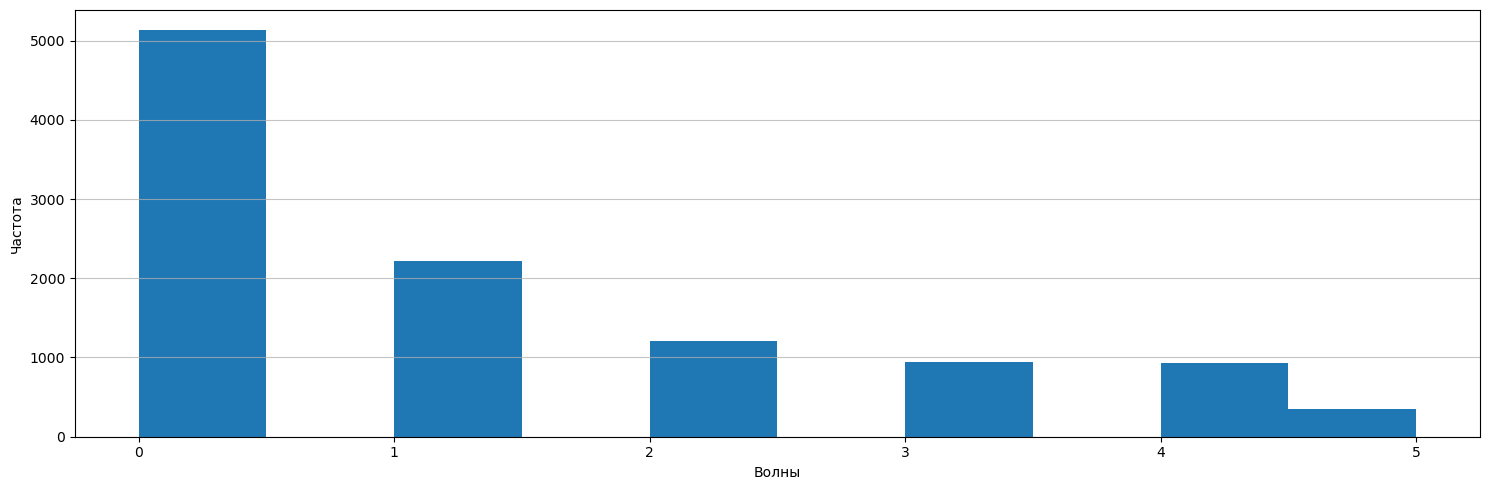

In [267]:
# посмотрим на распределение получившихся волн

plt.figure(figsize=(15, 5))  # устанавливаем размер графика

# гистограмма для count_hw_done
plt.hist(full_df['wave'])
plt.xlabel('Волны')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()  
plt.show()

На основании графика, можно сделать вывод что чаще всего ученики присоединяются к курсу до даты старта курса включительно

In [272]:
full_df.to_csv('full_df.csv', index=False)